## Observations and Insights 

#### 1. According to Bar graph, Drug Regimen 'Capomulin' has the maximum number around 230, and Zoniferol has smaller number around 182. The total count of mice by gender represented that 124 female mice and 125 male mice.

#### 2. Based on the statistic tablet and box plot, we can conclude that Capomulin and Ramicane treatments were more effective than other drugs. The experiment of Capomulin drug showed positive results for mouse ID 's185'  where the tumor volume (mm3) declined over the period of study.

#### 3. The correlation between mouse weight and average tumor volume is 0.84. This concluded that mouse weight icrease as long as the average tumor volume also increases. The regression analysis show how much the average tumor volume will change when the weight of mouse changes. It  demonstrated that 70 percent of model fits the data, this data is useful to predict the future data. 

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(merge_data['Mouse ID'].unique())
num_mice

249

In [3]:
merge_data['Mouse ID'].value_counts()
merge_data.shape

(1893, 8)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mice = merge_data.loc[merge_data.duplicated(
            subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupli_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupli_miceID = merge_data.loc[merge_data['Mouse ID'] == 'g989', :]
dupli_miceID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
update_merge1 = merge_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
update_merge1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
count_mice2 = len(update_merge1['Mouse ID'].unique())
count_mice2

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = update_merge1.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = update_merge1.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = update_merge1.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev = update_merge1.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = update_merge1.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_stat1 = pd.DataFrame({"Mean Tumor Vol": mean, "Median Tumor Vol": median, "Variance Tumor Vol": variance,
                        "Standard Deviation Tumor Vol": stdev, "SEM Tumor Vol":sem})
summary_stat1

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Standard Deviation Tumor Vol,SEM Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ_agg = update_merge1.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summ_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


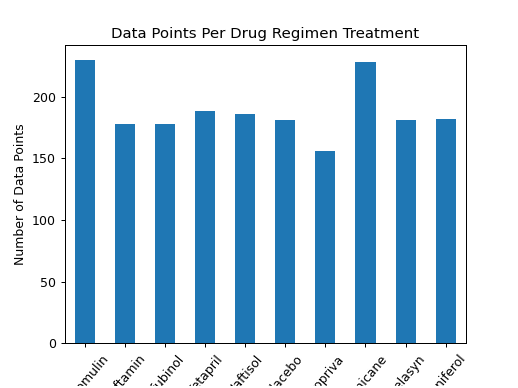

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_data_point = update_merge1.groupby("Drug Regimen").count()["Timepoint"]

# mice_data_point.plot(kind='bar', figsize=(7,5), align='center', fontsize =8)
mice_data_point.plot(kind='bar', legend=False, rot=50, align='center')
plt.title('Data Points Per Drug Regimen Treatment')
plt.ylabel('Number of Data Points')
plt.xlabel('Type of Drug Regimen')
plt.savefig('Bar_chart1')
plt.tight_layout
mice_data_point

<IPython.core.display.Javascript object>


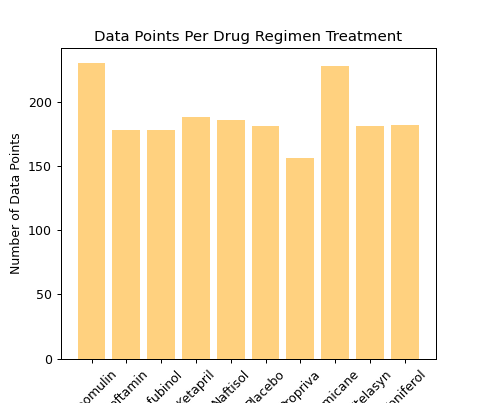

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_treatment = (update_merge1.groupby("Drug Regimen").count()["Timepoint"]).tolist()
x_axis = np.arange(len(mice_data_point))

tick_location = [value for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.bar(x_axis, count_treatment, color='orange', alpha=0.5, align='center')
# plt.bar(x_axis, count_treatment, align='center')
plt.xticks(tick_location, mice_data_point.index.values, rotation=45)
plt.title('Data Points Per Drug Regimen Treatment')
plt.xlabel('Type of Drug Regimen')
plt.ylabel('Number of Data Points')
plt.savefig('Bar_chart2.png')
plt.tight_layout

In [12]:
mouse_gender = update_merge1.groupby(['Mouse ID', 'Sex'])
gender_df= pd.DataFrame(mouse_gender.size())

count_gender = pd.DataFrame(gender_df.groupby(['Sex']).count())
count_gender.columns = ['Total Count']
count_gender

,Total Count
Sex,
Female,124
Male,125


<IPython.core.display.Javascript object>


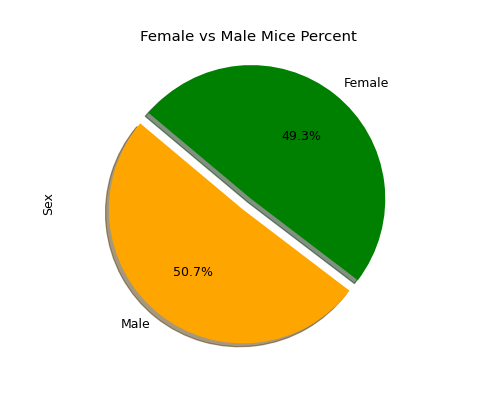

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_gender = update_merge1['Sex'].value_counts()
gender_data = pd.DataFrame({'Total Count': count_gender})

colors = ['orange', 'green']
explode = (0.1, 0)
fig2, ax2 = plt.subplots(figsize=(6,5))
pandas_pie = count_gender.plot(kind='pie', colors= colors, explode=explode, title='Female vs Male Mice Percent', 
                    startangle=140, shadow=True, autopct='%1.1f%%')

plt.axis('equal')
plt.savefig("Male_vs_Females_percent1.png")
plt.show()

<IPython.core.display.Javascript object>


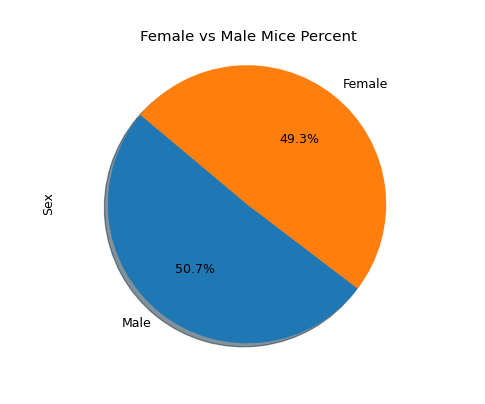

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_gender = update_merge1['Sex'].value_counts()

fig3, ax3 = plt.subplots(figsize=(6,5))
secondpie = count_gender.plot.pie(figsize=(6,5), shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Female vs Male Mice Percent')
plt.ylabel('Sex')

plt.axis('equal')
plt.savefig("Male_vs_Females_percent2.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = update_merge1.loc[update_merge1["Drug Regimen"] == "Capomulin",:]
ram_df = update_merge1.loc[update_merge1["Drug Regimen"] == "Ramicane", :]
inf_df = update_merge1.loc[update_merge1["Drug Regimen"] == "Infubinol", :]
ceft_df = update_merge1.loc[update_merge1["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = update_merge1.groupby('Mouse ID')["Timepoint"].max()
last_timepoint =pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
update_merge2 = last_timepoint.merge(update_merge1, on=['Mouse ID', 'Timepoint'], how='left')
update_merge2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
i = 1
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = update_merge2.loc[update_merge2["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    i=i+1
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
     
    print(f"{drug} below {lower_bound} could be outliers.")
    print(f"{drug} above {upper_bound} could be outliers.")
    print(f"For {drug}, the outliers are: {outliers}")

Capomulin below 20.70456164999999 could be outliers.
Capomulin above 51.83201549 could be outliers.
For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane below 17.912664470000003 could be outliers.
Ramicane above 54.30681135 could be outliers.
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol below 36.83290494999999 could be outliers.
Infubinol above 82.74144559000001 could be outliers.
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin below 25.355449580000002 could be outliers.
Ceftamin above 87.66645829999999 could be outliers.
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


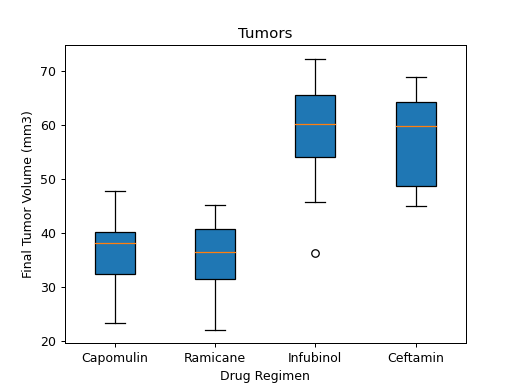

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig4, ax4 = plt.subplots()
ax4.set_title('Tumors')
ax4.set_xlabel('Drug Regimen')
ax4.set_ylabel('Final Tumor Volume (mm3)')

ax4.boxplot(total_tumor_vol, labels=treatments, widths=0.4, patch_artist=True, vert=True)

plt.savefig("pyplot_boxplot_tumor_vol.png")
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


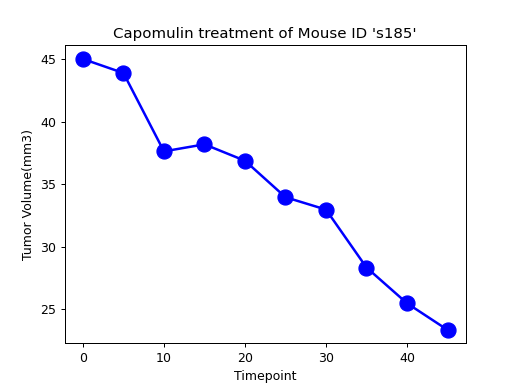

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = update_merge1.loc[update_merge1['Drug Regimen']=='Capomulin',:]

mouse_in_capomulin = capomulin_df.loc[capomulin_df['Mouse ID']=='s185']
x_axis = mouse_in_capomulin['Timepoint']
tumor_volume= mouse_in_capomulin['Tumor Volume (mm3)']

fig5, ax5 = plt.subplots()
plt.title("Capomulin treatment of Mouse ID 's185'")
plt.plot(x_axis, tumor_volume, linewidth=2, markersize=12, marker='o', color='blue')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume(mm3)')
plt.savefig('mouse_ID_with_treatment')
plt.show()

<IPython.core.display.Javascript object>


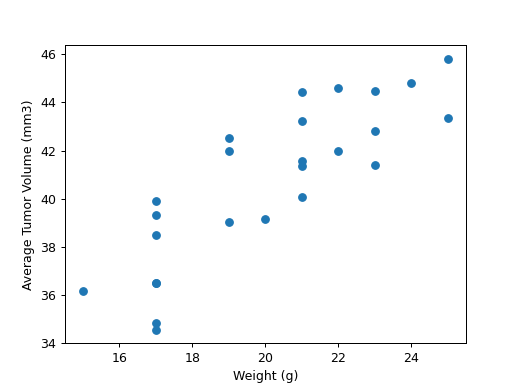

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capavg = cap_df.groupby('Mouse ID').mean()
fig6, ax6 = plt.subplots()
plt.scatter(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")


The correlation between mouse weight and average tumor volume is: 0.84


<IPython.core.display.Javascript object>


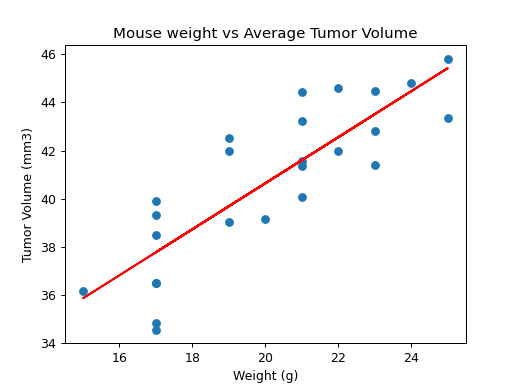

The equation of the regression line is y =  0.95x + 21.55


In [21]:
x_value = capavg['Weight (g)']
y_value = capavg['Tumor Volume (mm3)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

#line_equation = formula of y = mx + b
line_equation = f"y =  {round(slope,2)}x + {round(intercept,2)}"

fig7, ax7 = plt.subplots()

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values,"r-")
plt.title("Mouse weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_equation,(10,30), fontsize = 10)

print(f"The equation of the regression line is {line_equation}")
plt.savefig('refression_line_1')
plt.show()